# Digital Signal Processing

## Solutions: Exercise4

### Part 1: Non-Recursive Filters

#### Task 1: window functions
**a)** The following figures show the most used window functions like rectangular, Hann, Hamming, Blackman and Bartlett window for a length $m=42$. On the right hand side are the respective fourier transforms for the filter length $m=21$ and $m=42$.

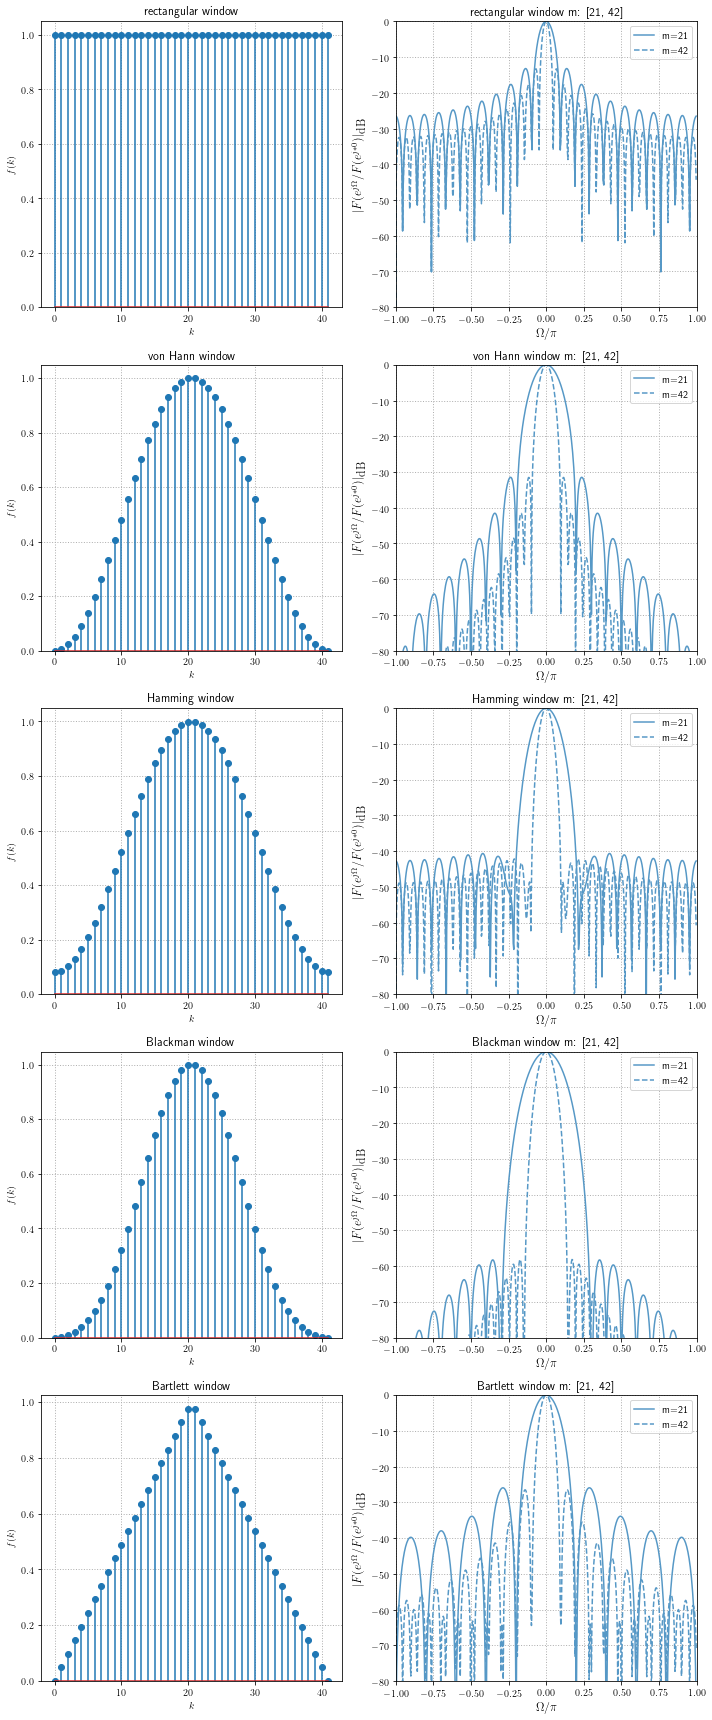

In [43]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from functions.ldtft import ldtft 

window_length = [21, 42]


fig, axs = plt.subplots(5, 2, figsize=(10, 24))#

for typ in range(5):
    rw = []
    Rw = []
    W = []
    if typ == 0:
        tltstr = 'rectangular window'
        for wlen in window_length:
            rwtmp = signal.boxcar(wlen)      # Create window of length wlen
            rw.append(rwtmp)
            Rwtmp, Wtmp = ldtft(rwtmp, 512)  # Calculate dtft of window
            i=np.where(np.abs(Rwtmp)==0)     # avoid values==0
            Rwtmp[i]=1e-100*np.ones(len(i))  # to allow division scaling for plotting
            Rw.append(Rwtmp)
            W.append(Wtmp)        
    elif typ == 1:
        tltstr = 'von Hann window'
        for wlen in window_length:
            rwtmp = signal.hann(wlen)
            rw.append(rwtmp)
            Rwtmp, Wtmp = ldtft(rwtmp, 512)
            i=np.where(np.abs(Rwtmp)==0)
            Rwtmp[i]=1e-100*np.ones(len(i))
            Rw.append(Rwtmp)
            W.append(Wtmp)   
    elif typ == 2:
        tltstr = 'Hamming window'
        for wlen in window_length:
            rwtmp = signal.hamming(wlen)
            rw.append(rwtmp)
            Rwtmp, Wtmp = ldtft(rwtmp, 512)
            i=np.where(np.abs(Rwtmp)==0)
            Rwtmp[i]=1e-100*np.ones(len(i))
            Rw.append(Rwtmp)
            W.append(Wtmp)   
    elif typ == 3:
        tltstr = 'Blackman window'
        for wlen in window_length:
            rwtmp = signal.blackman(wlen)
            rw.append(rwtmp)
            Rwtmp, Wtmp = ldtft(rwtmp, 512)
            i=np.where(np.abs(Rwtmp)==0)
            Rwtmp[i]=1e-100*np.ones(len(i))
            Rw.append(Rwtmp)
            W.append(Wtmp)   
    elif typ == 4:
        tltstr = 'Bartlett window'
        for wlen in window_length:
            rwtmp = signal.bartlett(wlen)
            rw.append(rwtmp)
            Rwtmp, Wtmp = ldtft(rwtmp, 512)
            i=np.where(np.abs(Rwtmp)==0)
            Rwtmp[i]=1e-100*np.ones(len(i))
            Rw.append(Rwtmp)
            W.append(Wtmp)   
    else:
        print('something is wrong...')

    # time domain representation of window
    axs[typ,0].stem(rw[1], use_line_collection=True)
    axs[typ,0].grid(linestyle=':', linewidth=1)
    axs[typ,0].set_title(tltstr)
    axs[typ,0].set_xlabel('$k$')
    axs[typ,0].set_ylabel('$f(k)$')
    axs[typ,0].axis([None, None, 0, None])
        
    # plotting the normalized absolute value of frequency response for n==21
    axs[typ,1].plot(W[0]/np.pi, 20*np.log10(np.abs(Rw[0]/max(Rw[0]))), color='#5698c6', label='m='+str(window_length[0]))
    axs[typ,1].plot(W[1]/np.pi, 20*np.log10(np.abs(Rw[1]/max(Rw[1]))), '--', color='#5698c6', label='m='+str(window_length[1]))
    axs[typ,1].set_title(tltstr + ' m: ' + str(window_length))
    axs[typ,1].set_xlabel(r'$\Omega/\pi$', fontsize='large')
    axs[typ,1].set_ylabel(r'$|F(e^{j\Omega}/F(e^{j*0})|_{\textrm{dB}}$', fontsize='large')
    axs[typ,1].axis([-1, 1, -80, 0])
    axs[typ,1].grid(linestyle=':', linewidth=1)
    axs[typ,1].legend()
    

plt.tight_layout()

The time domain representation of each window function shows the symmetry, which guarantees a linear phase. If we evaluate the fourier-transform of the window functions to analyze the filter behavior, principally we could come out with a statement, with a rising order $m$, the spectrum is proportionally buckling. Therefore, the pass band[1] $\Omega < \Omega_s$ is reduced accordingly with an increment from $m=21$ to $m=42$. The stop band behavior ($\Omega \rightarrow \pi$) validates that it is better if the filter order is higher. If the attenuation of the first shot is considered, it shows an attenuation independent from $m$ w.g. $a_N \approx 57 \, \textrm{dB}$, by Blackman window.  
A comparison between the windows verifies a compromise between the achievable pass band and the attenuation of the first overshot. While the rectangular window has the smallest pass band of $2\pi/(m+1)$ and the lowest attenuation of $a_N \approx 13.3 \, \textrm{dB}$, the Blackman window has the widest pass band of $6\pi/(m+1)$, but at the same time it also has the highest attenuation of the first overshot.  
More explanation to this subject can be found in chapter 5 and 8.

**b)** The following figures show the time domain plots and the Fourier transform of the Kaiser window for values $\beta = 0, 3, 6$ with a window length of $m=21$. For $\beta=0$, the Kaiser window corresponds to the rectangular window and has therefore the smallest pass band for this parameter option, but also the lowest first overshot attenuation. An increment of $\beta$ at a constant filter order improves the attenuation behavior and at the same time, the pass band would be wider. With the help of the free parameter $\beta$, a compromise between the pass band and the attenuation behavior could be found. A complete description of the Kaiser window is shown in table 5.4.

[1]: pass band means the area until the first zero of the spectra.

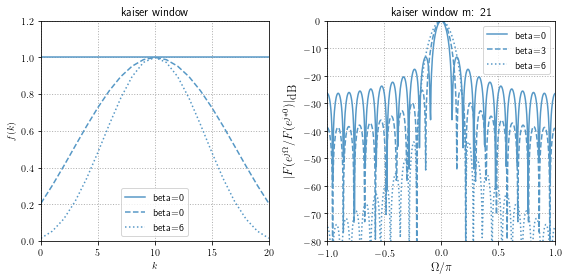

In [23]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from functions.ldtft import ldtft 

window_length = 21
beta = [0, 3, 6]

fig, axs = plt.subplots(1, 2, figsize=(8, 4))#
rw = []
Rw = []
W = []
tltstr = 'kaiser window'
for b in beta:
    rwtmp = signal.kaiser(window_length, b)      # Create window of length wlen
    rw.append(rwtmp)
    Rwtmp, Wtmp = ldtft(rwtmp, 512)  # Calculate dtft of window
    i=np.where(np.abs(Rwtmp)==0)     # avoid values==0
    Rwtmp[i]=1e-100*np.ones(len(i))  # to allow division scaling for plotting
    Rw.append(Rwtmp)
    W.append(Wtmp)

# time domain representation of window
axs[0].plot(rw[0], color='#5698c6', label='beta='+str(beta[0]))
axs[0].plot(rw[1], '--',color='#5698c6', label='beta='+str(beta[0]))
axs[0].plot(rw[2], ':', color='#5698c6', label='beta='+str(beta[2]))
axs[0].grid(linestyle=':', linewidth=1)
axs[0].set_title(tltstr)
axs[0].set_xlabel('$k$')
axs[0].set_ylabel('$f(k)$')
axs[0].axis([0, 20, 0, 1.2])
axs[0].legend()

# plotting the normalized absolute value of frequency response for n==21
axs[1].plot(W[0]/np.pi, 20*np.log10(np.abs(Rw[0]/max(Rw[0]))), color='#5698c6', label='beta='+str(beta[0]))
axs[1].plot(W[1]/np.pi, 20*np.log10(np.abs(Rw[1]/max(Rw[1]))), '--', color='#5698c6', label='beta='+str(beta[1]))
axs[1].plot(W[2]/np.pi, 20*np.log10(np.abs(Rw[2]/max(Rw[2]))), ':', color='#5698c6', label='beta='+str(beta[2]))
axs[1].set_title(tltstr + ' m: ' + str(window_length))
axs[1].set_xlabel(r'$\Omega/\pi$', fontsize='large')
axs[1].set_ylabel(r'$|F(e^{j\Omega}/F(e^{j*0})|_{\textrm{dB}}$', fontsize='large')
axs[1].axis([-1, 1, -80, 0])
axs[1].grid(linestyle=':', linewidth=1)
axs[1].legend()
    

plt.tight_layout()

#### Task 2: design of non recursive filters using windowing techniques
**a)** In the following figures, the amplitude responnses of each filter with order $m=50$ are plotted.


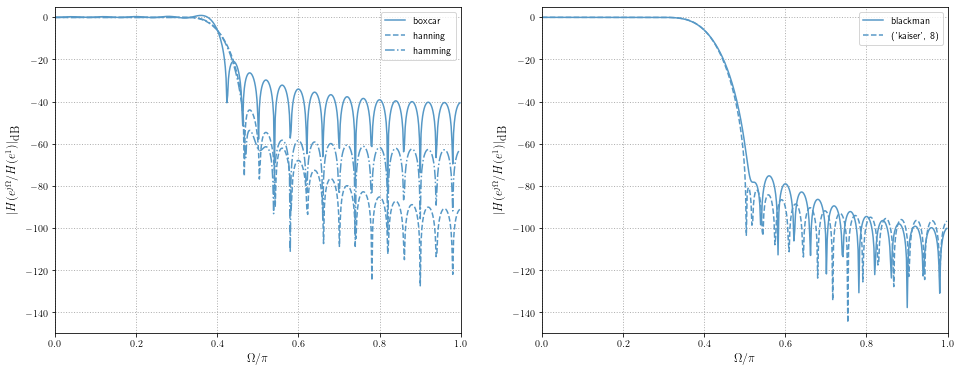

In [57]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from functions.ldtft import ldtft

# list of windows to use for lowpass design
window_list = ['boxcar', 'hanning', 'hamming', 'blackman', ('kaiser', 8)]
symb = ['-', '--', '-.','-', '--']
# cutoff frequency
Wn=0.4
# filter length = filter order+1
numtaps = 51

fig, axs = plt.subplots(1, 2, figsize=(16, 6))
# Plot first 3 windows in one plot
for win in range(len(window_list)-2):
    # Create type I filter with firwin using the window method
    b = signal.firwin(numtaps, Wn, window=window_list[win]) 
    # Compute frequency response of filter with freqz
    W, H = signal.freqz(b, 1, 512)
    i=np.where(np.abs(H)==0)     # avoid values==0
    H[i]=1e-100*np.ones(len(i))  # to allow division scaling for plotting
    axs[0].plot(W/np.pi, 20*np.log10(np.abs(H/max(H))), symb[win], color='#5698c6', label=window_list[win])

# Plot last 2 windows in other plot 
for win in range(3, len(window_list)):
    b = signal.firwin(numtaps, Wn, window=window_list[win])
    W, H = signal.freqz(b, 1, 512)
    i=np.where(np.abs(H)==0)
    H[i]=1e-100*np.ones(len(i))
    axs[1].plot(W/np.pi, 20*np.log10(np.abs(H/max(H))), symb[win], color='#5698c6', label=window_list[win])


axs[0].set_xlabel(r'$\Omega/\pi$', fontsize='large')
axs[0].set_ylabel(r'$|H(e^{j\Omega}/H(e^{1})|_{\textrm{dB}}$', fontsize='large')
axs[0].axis([0, 1, -150, 5])
axs[0].grid(linestyle=':', linewidth=1)
axs[0].legend()

axs[1].set_xlabel(r'$\Omega/\pi$', fontsize='large')
axs[1].set_ylabel(r'$|H(e^{j\Omega}/H(e^{1})|_{\textrm{dB}}$', fontsize='large')
axs[1].axis([0, 1, -150, 5])
axs[1].grid(linestyle=':', linewidth=1)
axs[1].legend()

plt.show()

The figures show the normalized cut-off frequency of `Wn=0.4`, which is used for all filter designs. A comparison between the amplitude responses shows the problem of finding a compromise between the highest first shot attenuation possible and the smallest possible pass band. If we compare the Kaiser- against the Blackman-window, it is an advantage to know the free parameter $\beta$. At almost similar steepness of the slope, the Kaiser window has a small pass-band, ($\Omega_S/\pi \approx 0.5$ against $\Omega_S/\pi \approx 0.55$) and at the same time a better first overshot ($a_N \approx 83 \, \textrm{dB}$ against $a_N \approx 75 \, \textrm{dB}$).


**b)** The portrayed trend shows the amplitude resonse of a high-pass with order $m=33$ and a normalized frequency limit of 0.4. A Hamming-window is used here.



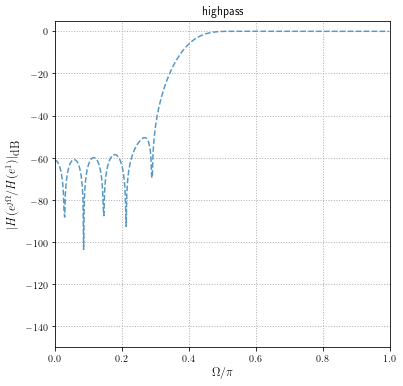

In [72]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from functions.ldtft import ldtft

# cutoff frequency
Wn=0.4
# filter length = filter order+1
numtaps = 33

fig, axs = plt.subplots(figsize=(6, 6))
b=signal.firwin(numtaps, Wn, pass_zero='highpass', window='hamming')
# Compute frequency response of filter with freqz
W, H = signal.freqz(b, 1, 512)
i=np.where(np.abs(H)==0)     # avoid values==0
H[i]=1e-100*np.ones(len(i))  # to allow division scaling for plotting
axs.plot(W/np.pi, 20*np.log10(np.abs(H/max(H))), symb[win], color='#5698c6')

axs.set_title('highpass')
axs.set_xlabel(r'$\Omega/\pi$', fontsize='large')
axs.set_ylabel(r'$|H(e^{j\Omega}/H(e^{1})|_{\textrm{dB}}$', fontsize='large')
axs.axis([0, 1, -150, 5])
axs.grid(linestyle=':', linewidth=1)

plt.show()

When designing a high-pass with the Python-function `firwin()` and `numtabs=32`, Python generates following warning:  
`ValueError: A filter with an even number of coefficients must have zero response at the Nyquist frequency.` and the function call fails.  
The `firwin()` function designs filter from type I or II, depending on if the order is even or odd.
When the order is odd (type II), the frequency response must have a zero at the Nyquist Frequency $\Omega/\pi=1$, which contradicts with the demanded high-pass behavior.


**c)** If the group delay is calculated using the function `grpdelay()`, we get the following plot against the normalized frequency for the designed low-pass in task **2.a** with $m=50$ (window function: Hamming):

The plot shows a constant group delay and clarifies the demanded linearity of a system.

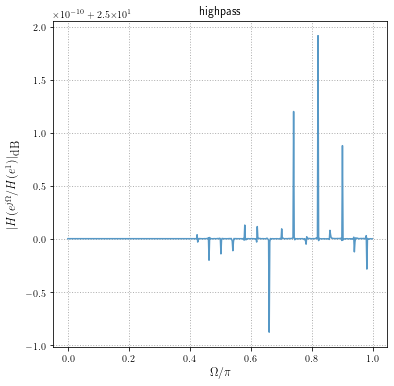

In [16]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from functions.ldtft import ldtft

# cutoff frequency
Wn=0.4
# filter length = filter order+1
numtaps = 51

fig, axs = plt.subplots(figsize=(6, 6))
b = signal.firwin(numtaps, Wn, window='boxcar')
# Compute frequency response of filter with freqz
W, GD = signal.group_delay((b,1))
#i=np.where(np.abs(H)==0)     # avoid values==0
#H[i]=1e-100*np.ones(len(i))  # to allow division scaling for plotting
axs.plot(W/np.pi, GD, color='#5698c6')

axs.set_title('highpass')
axs.set_xlabel(r'$\Omega/\pi$', fontsize='large')
axs.set_ylabel(r'$|H(e^{j\Omega}/H(e^{1})|_{\textrm{dB}}$', fontsize='large')
#axs.axis([0, 1, -150, 5])
axs.grid(linestyle=':', linewidth=1)

plt.show()

#### Task 3: remez design (Chebyshev-approximation)

**a)** Both portrayed amplitude responses are examples for the design of lienar low-passes using the Chebyshev-approximation in pass-band and stop-band. The design is done with the help of the \textit{remez-design}, where the intervals [0 0.3] and [0.5 1] are fixed. The filter orders are $m=9$ and $m=10$. 



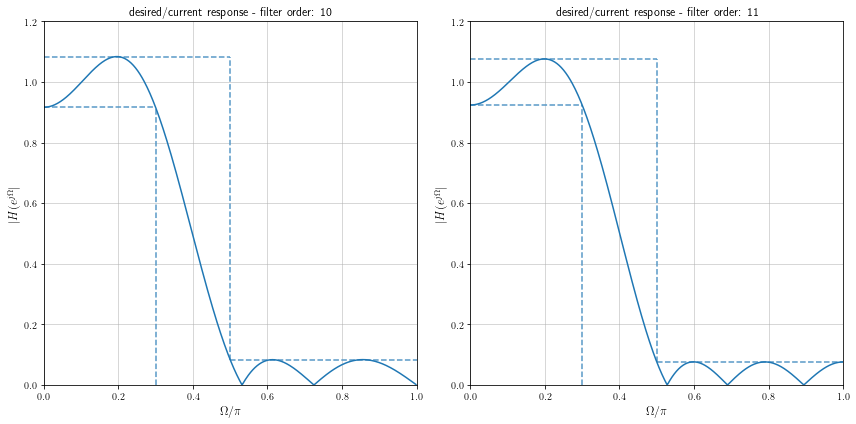

In [33]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from functions.zplane import zplane_ax 

# filter design
f = [0, 0.15, 0.25, 0.5]               # frequencies of pass- and stopband
g = [1, 0]                             # impulse response
v_m = [10, 11]                         # vector of filter tabs

# Graphical output
fig, axs = plt.subplots(1, 2, figsize=(12, 6))


for i in range(len(v_m)):
    b = signal.remez(v_m[i],f,g)   # remez filter design
    [W,H] = signal.freqz(b,1,512)     # calculate the frequency response
    TitleString = 'desired/current response - filter order: ' + str(v_m[i])
    axs[i].plot(W/np.pi, np.abs(H))
    axs[i].set_title(TitleString)
    axs[i].set_xlabel(r'$\Omega/\pi$', fontsize='large')
    axs[i].set_ylabel(r'$|H(e^{j\Omega}|$', fontsize='large')
    axs[i].axis([0,1,0,1.2])
    axs[i].grid(linewidth=0.5)
    axs[i].hlines(y=2-max(np.abs(H)), xmin=0, xmax=0.3, colors='#5698c6', linestyles='dashed')
    axs[i].hlines(y=max(np.abs(H)), xmin=0, xmax=0.5, colors='#5698c6', linestyles='dashed')
    axs[i].vlines(x=0.3, ymin=0, ymax=2-max(np.abs(H)), colors='#5698c6', linestyles='dashed')
    axs[i].vlines(x=0.5, ymin=max(np.abs(H[400:len(H)])), ymax=max(np.abs(H)), colors='#5698c6', linestyles='dashed')
    axs[i].hlines(y=max(np.abs(H[400:len(H)])), xmin=0.5, xmax=1, colors='#5698c6', linestyles='dashed')



plt.tight_layout()

Both plots verify the uniform approximation in pass-band and stop band. The number of the extrema, which touch the tolerance scheme, including the boundary values is $\lfloor m/2 \rfloor + 2$ with $m=9,10$ in both of the amplitude responses.

**b)** If we assign the stop band a larger weight value than the pass-band, e.g. factor four, the frequency responses are as follows for the same boundary condition as in task **3.a**:


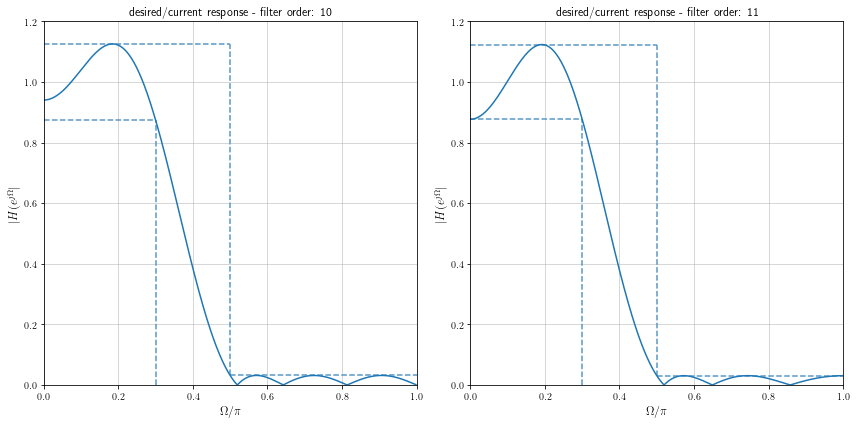

In [35]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from functions.zplane import zplane_ax 

# filter design
f = [0, 0.15, 0.25, 0.5]               # frequencies of pass- and stopband
g = [1, 0]                             # impulse response
w = [0.5, 2]                           # weightings for pass- and stopband
v_m = [10, 11]                         # vector of filter tabs

# Graphical output
fig, axs = plt.subplots(1, 2, figsize=(12, 6))


for i in range(len(v_m)):
    b = signal.remez(v_m[i],f,g,w)   # remez filter design
    [W,H] = signal.freqz(b,1,512)     # calculate the frequency response
    TitleString = 'desired/current response - filter order: ' + str(v_m[i])
    axs[i].plot(W/np.pi, np.abs(H))
    axs[i].set_title(TitleString)
    axs[i].set_xlabel(r'$\Omega/\pi$', fontsize='large')
    axs[i].set_ylabel(r'$|H(e^{j\Omega}|$', fontsize='large')
    axs[i].axis([0,1,0,1.2])
    axs[i].grid(linewidth=0.5)
    axs[i].hlines(y=2-max(np.abs(H)), xmin=0, xmax=0.3, colors='#5698c6', linestyles='dashed')
    axs[i].hlines(y=max(np.abs(H)), xmin=0, xmax=0.5, colors='#5698c6', linestyles='dashed')
    axs[i].vlines(x=0.3, ymin=0, ymax=2-max(np.abs(H)), colors='#5698c6', linestyles='dashed')
    axs[i].vlines(x=0.5, ymin=max(np.abs(H[400:len(H)])), ymax=max(np.abs(H)), colors='#5698c6', linestyles='dashed')
    axs[i].hlines(y=max(np.abs(H[400:len(H)])), xmin=0.5, xmax=1, colors='#5698c6', linestyles='dashed')



plt.tight_layout()

A comparison with the task **3.a** clarifies the influence of the weight on the stop-band and the pass-band.

**c)** Because of the given frequency bands, frequency responses and weight factors, the design of selective systems is very easily possible using the remez-design. The following example shows the design of a low-pass-band-pass-combination specified in the exercise:

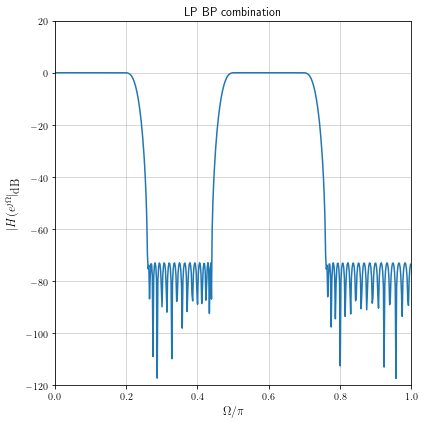

In [46]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from functions.zplane import zplane_ax 

# filter design
f = [0, 0.1, 0.13, 0.22, 0.25, 0.35, 0.38, 0.5]  # frequencies of pass- and stopband
g = [1, 0, 1, 0]                                 # impulse response
w = [1, 4, 1, 4]                                 # weightings for pass- and stopband
numtaps = 129
# Graphical output
fig, ax = plt.subplots(figsize=(6, 6))

b = signal.remez(numtaps,f,g,w)   # remez filter design
[W,H] = signal.freqz(b,1,512)     # calculate the frequency response
TitleString = 'LP BP combination'
ax.plot(W/np.pi, 20*np.log10(np.abs(H)))

ax.set_title(TitleString)
ax.set_xlabel(r'$\Omega/\pi$', fontsize='large')
ax.set_ylabel(r'$|H(e^{j\Omega}|_{\textrm{dB}}$', fontsize='large')
ax.axis([0,1,-120,20])
ax.grid(linewidth=0.5)



plt.tight_layout()

#### Task 4: design of a differentiator
**a)** The problem of this exercise is to design a differentiator, whose ideal frequency response is $H(e^{j\Omega}) = j\Omega$, within the interval $[0,\pi]$ using Chebyshevf-Approximation. With the help of the remez-design (Python-function: `firpm()`), which is described in task **3**, we get the following amplitude responses and impulse responses for the filter order $m=21$ and $m=22$:



23
22


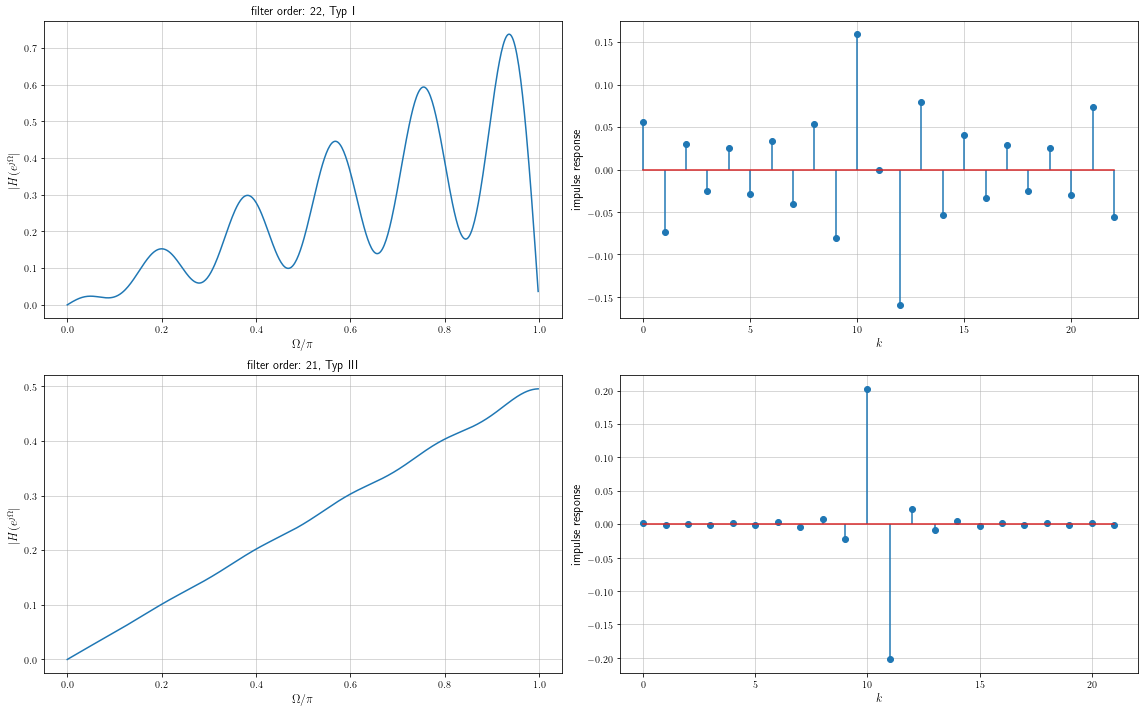

In [28]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from functions.zplane import zplane_ax 

# filter design
f = [0, 0.5]                            # frequencies of pass- and stopband
g = [1]                                 # impulse response
#w = [0.5, 2]                           # weightings for pass- and stopband
v_m = [23, 22]                          # vector of filter tabs
typ = ['I','III']
# Graphical output
fig, axs = plt.subplots(2, 2, figsize=(16, 10))


for i in range(len(v_m)):
    b = signal.remez(v_m[i],f,g,type='differentiator')   # remez filter design
    [W,H] = signal.freqz(b,1,512)     # calculate the frequency response
    TitleString = 'filter order: ' + str(v_m[i]-1) + ', Typ ' + typ[i]
    axs[i,0].plot(W/np.pi, np.abs(H))
    axs[i,0].set_title(TitleString)
    axs[i,0].set_xlabel(r'$\Omega/\pi$', fontsize='large')
    axs[i,0].set_ylabel(r'$|H(e^{j\Omega}|$', fontsize='large')
    #axs[i].axis([0,1,0,1.2])
    axs[i,0].grid(linewidth=0.5)
    axs[i,1].stem(b, use_line_collection=True)
    axs[i,1].set_xlabel(r'$k$', fontsize='large')
    axs[i,1].set_ylabel(r'impulse response', fontsize='large')
    axs[i,1].grid(linewidth=0.5)

plt.tight_layout()

In the system considered here, it describes linear filter of type I and type III.

**b)** The impulse response of a non causal and band limited _time continuous_ differentiator is a point symmetric function (5.4.6). In terms of an _impulse variance_ design, see paragraph 5.4.1, it is therefore necessary to design filter of type II resp. type IV. If we use the optional parameter `'d'` when calling the function `firpm`, we get the following plots for the amplitude responses and impulse responses for $m=21$ and $m=22$:

A comparison of both amplitude responses clarifies the consideration of the four possible alternatives of a linear non-recursive system. Even though a higher but even order ($m=22$) is used, the approximation of the ideal frequency response is worse than the lower, odd filter order ($m=21$) because of the zero at $\Omega=\pi$.
